In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import yfinance as yf
import pandas_datareader as pdr

tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "UNH",
           "META","SNA","GS","XOM","NKE","BAX", "MOH","BRK-B", "MSFT"] 

df = yf.download(tickers, datetime(2022, 6, 17), datetime.now())
df = df['Adj Close']
df.tail()


[*********************100%***********************]  17 of 17 completed


,AAPL,AMD,BAX,BRK-B,DPZ,GME,GOOG,GS,META,MOH,MSFT,NFLX,NKE,SNA,SPY,UNH,XOM
Date,,,,,,,,,,,,,,,,,
2023-06-12,183.789993,129.190002,42.709999,333.600006,300.650116,24.299999,124.349998,339.489990,271.049988,288.670013,331.850006,423.970001,106.830002,267.260010,432.194550,490.576172,106.419998
2023-06-13,183.309998,124.529999,43.470001,336.390015,300.680023,26.950001,124.430000,342.500000,271.320007,290.850006,334.290009,435.730011,106.779999,273.630005,435.043976,489.301422,106.440002
2023-06-14,183.949997,127.330002,43.450001,335.899994,305.720001,25.700001,124.379997,338.420013,273.350006,275.489990,337.339996,440.859985,112.860001,271.779999,435.562042,457.979980,105.160004
2023-06-15,186.009995,124.239998,44.459999,339.820007,325.459991,24.840000,125.790001,339.739990,281.829987,283.809998,348.100006,445.269989,112.410004,274.269989,440.962006,465.890015,105.889999
2023-06-16,184.919998,120.080002,45.360001,338.309998,331.410004,24.559999,124.059998,338.309998,281.000000,278.019989,342.329987,431.959991,113.589996,273.869995,439.459991,458.489990,105.129997


In [22]:
df_corr = df.corr()
df_corr

,AAPL,AMD,BAX,BRK-B,DPZ,GME,GOOG,GS,META,MOH,MSFT,NFLX,NKE,SNA,SPY,UNH,XOM
AAPL,1.000000,0.862938,-0.277961,0.481943,-0.232771,0.153796,0.753880,-0.007986,0.823206,-0.265088,0.900011,0.405605,0.220669,0.531744,0.798963,-0.176354,0.087509
AMD,0.862938,1.000000,-0.309474,0.514469,-0.132231,0.154640,0.795204,-0.045608,0.877512,-0.549303,0.926001,0.421572,0.369647,0.530948,0.823146,-0.363349,0.020497
BAX,-0.277961,-0.309474,1.000000,-0.682204,0.741350,0.792646,0.204568,-0.364400,-0.467031,0.477856,-0.345095,-0.843255,-0.560145,-0.803660,-0.442384,0.633336,-0.779646
BRK-B,0.481943,0.514469,-0.682204,1.000000,-0.353732,-0.490431,0.124463,0.603726,0.536180,-0.387156,0.597396,0.865546,0.644872,0.929751,0.800990,-0.331471,0.750755
DPZ,-0.232771,-0.132231,0.741350,-0.353732,1.000000,0.715711,0.150755,0.047396,-0.412631,0.226813,-0.252546,-0.593406,-0.061519,-0.516903,-0.081913,0.539899,-0.492617
GME,0.153796,0.154640,0.792646,-0.490431,0.715711,1.000000,0.540617,-0.321681,-0.119847,0.255318,0.030678,-0.643732,-0.396086,-0.576727,-0.042421,0.506497,-0.746425
GOOG,0.753880,0.795204,0.204568,0.124463,0.150755,0.540617,1.000000,-0.366027,0.691754,-0.247372,0.786978,-0.009288,0.004947,0.089454,0.550168,-0.068643,-0.397704
GS,-0.007986,-0.045608,-0.364400,0.603726,0.047396,-0.321681,-0.366027,1.000000,-0.185390,0.141737,-0.070835,0.541729,0.390258,0.584652,0.433861,0.111379,0.698313
META,0.823206,0.877512,-0.467031,0.536180,-0.412631,-0.119847,0.691754,-0.185390,1.000000,-0.636957,0.931797,0.502477,0.426644,0.595034,0.723263,-0.571999,0.141524
MOH,-0.265088,-0.549303,0.477856,-0.387156,0.226813,0.255318,-0.247372,0.141737,-0.636957,1.000000,-0.475458,-0.335390,-0.572344,-0.397315,-0.371149,0.787122,-0.179201


<h3><li> Select higher correletion stocks </li></h3>

<AxesSubplot: >

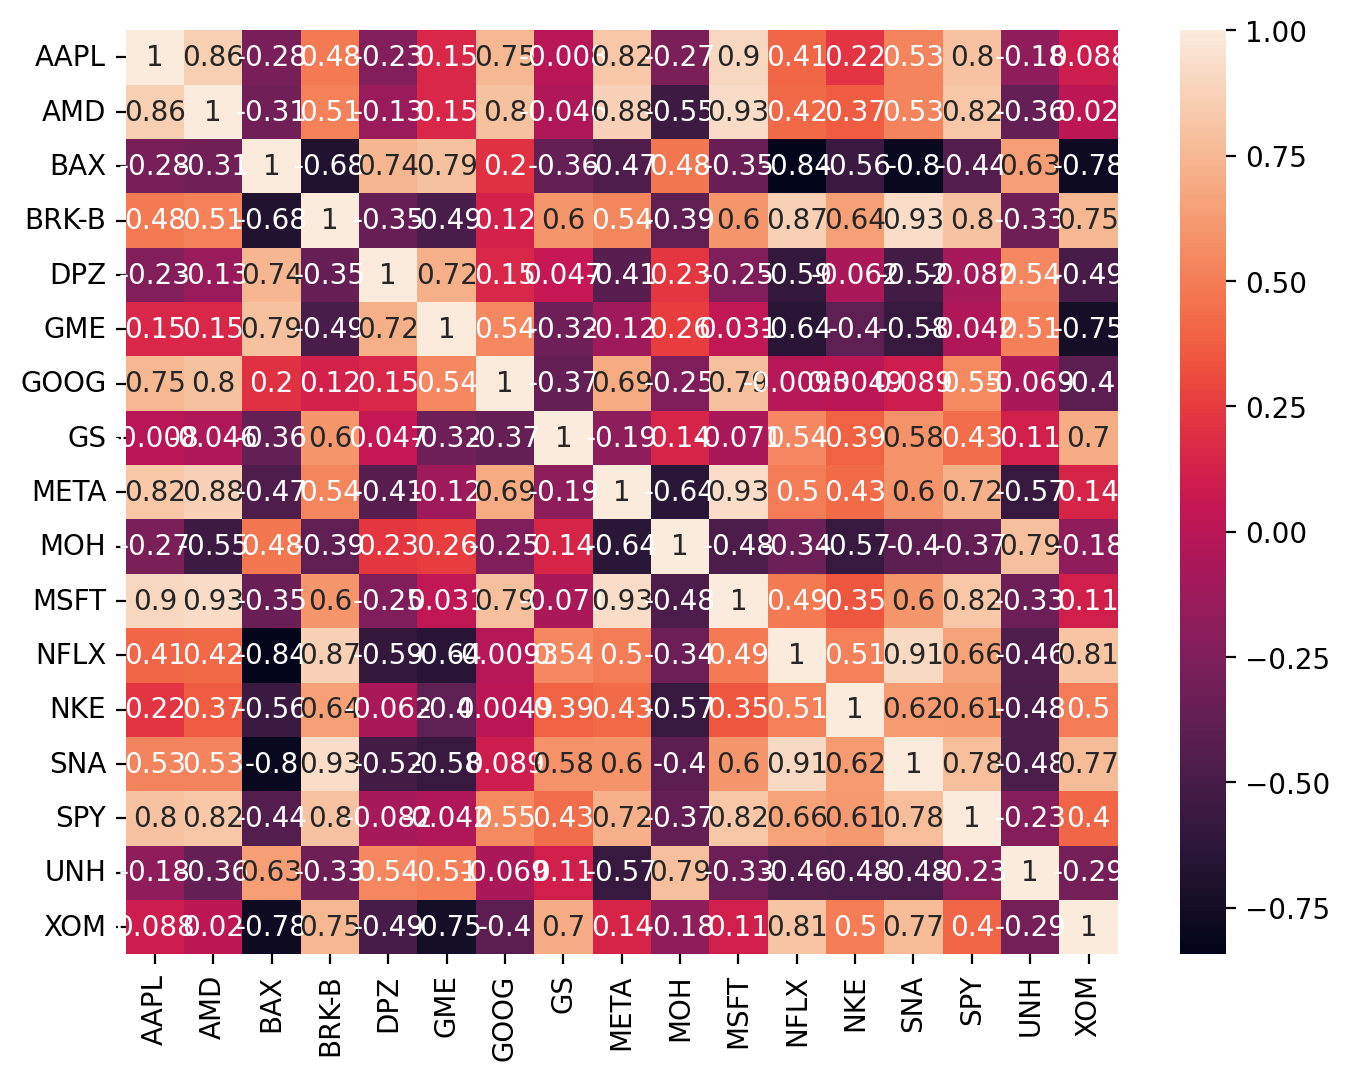

In [23]:
import seaborn as sn

plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['figure.dpi'] = 200
sn.heatmap( df_corr, annot= True )

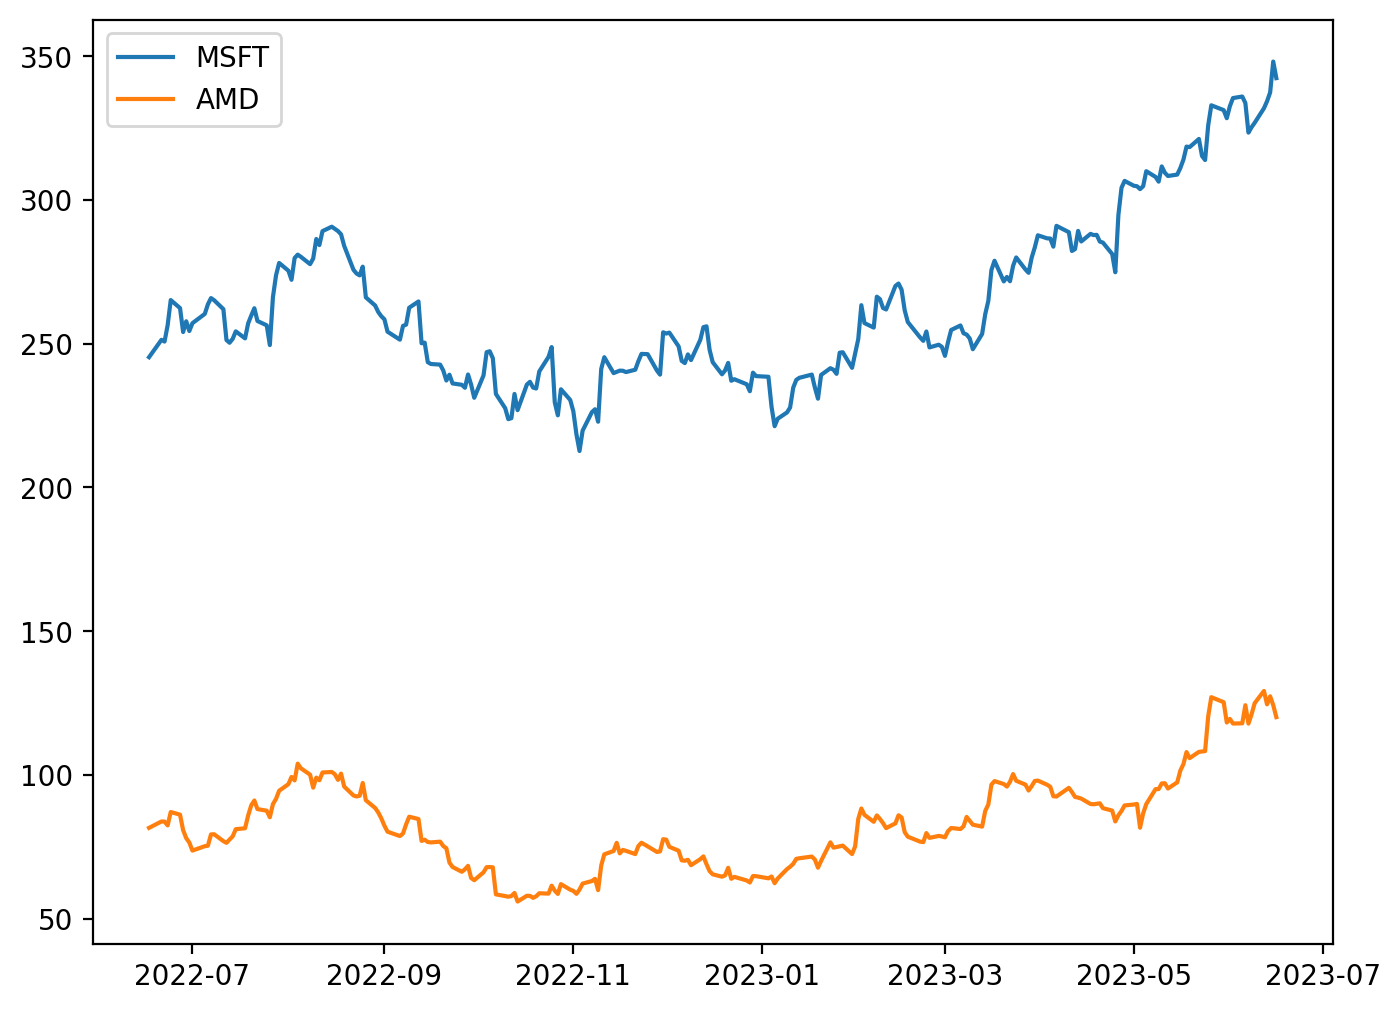

In [24]:
MSFT = df['MSFT']
AMD = df['AMD']
plt.plot(MSFT, label = 'MSFT')
plt.plot(AMD, label = 'AMD')
plt.legend()   

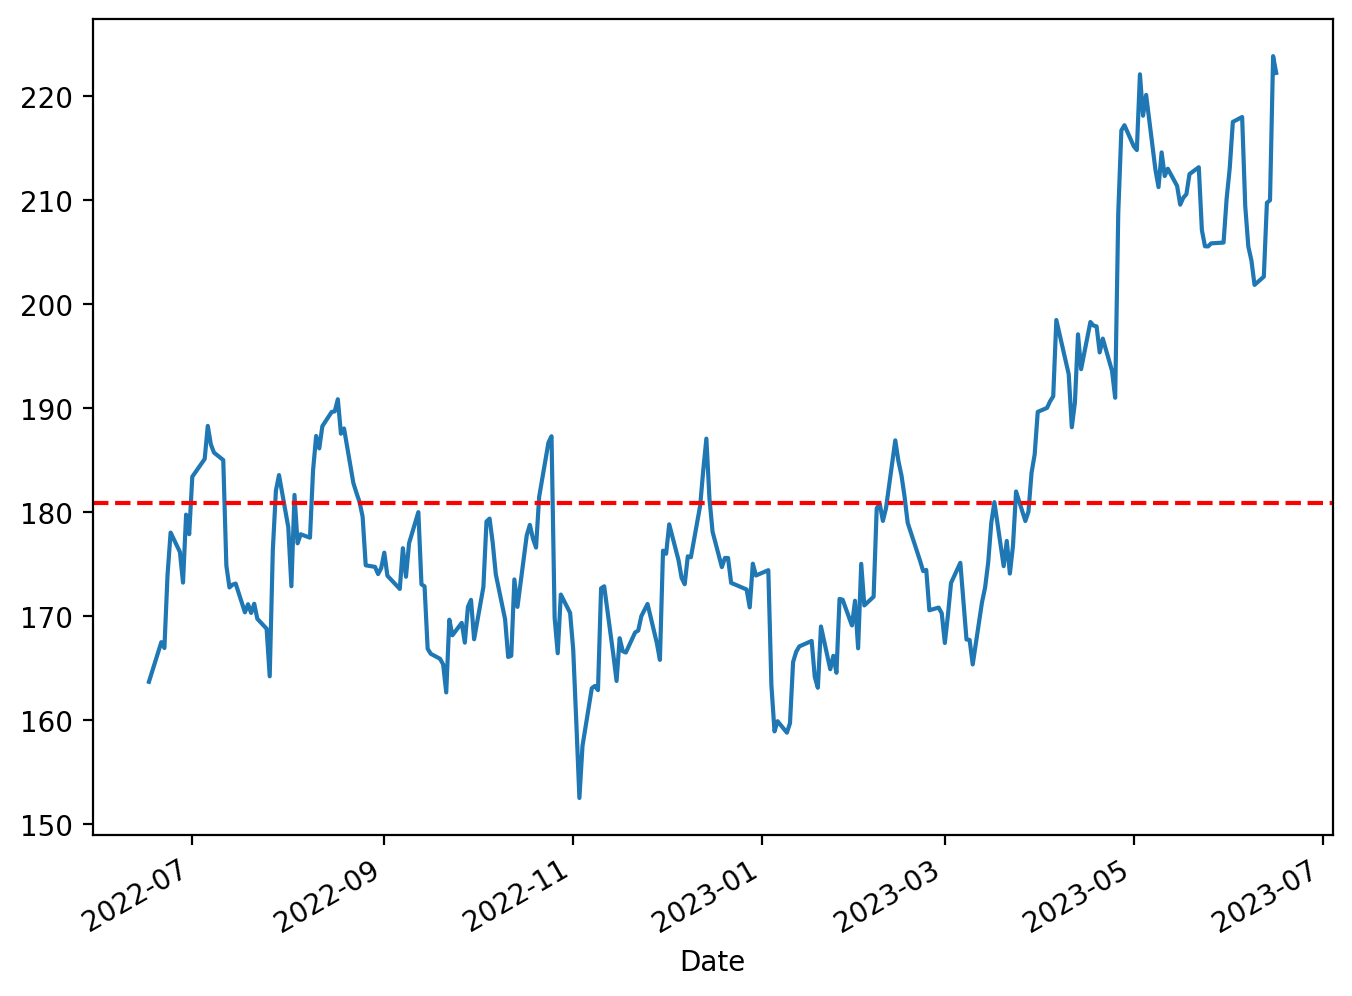

In [25]:
(MSFT - AMD).plot()
plt.axhline((MSFT - AMD).mean(), color='red', linestyle='--')

<h3><li> Not Cointegrated </li></h3>

<h1>Cointegration test</h1>

In [26]:
import statsmodels as sm
from statsmodels.tsa.stattools import coint

coint( MSFT, AMD)

(-3.194191786088701,
 0.07090450903048054,
 array([-3.94078403, -3.36067957, -3.06145832]))

In [27]:
score, pvalue, _ = coint( MSFT, AMD)
print (pvalue)


0.07090450903048054


In [28]:
def cointgration(pvalue):

    if pvalue < 0.05:
        print('Likely Cointegrated')    
    else:
       print('Likely not Cointegrated')

In [29]:
cointgration(pvalue)

Likely not Cointegrated


In [31]:
BRKB = df['BRK-B']
SNA = df['SNA']
AAPL = df['AAPL']
coint(MSFT, AAPL)
score, pvalue, _ = coint(BRKB, SNA)
print('pvalue is: ', pvalue )
cointgration(pvalue)


pvalue is:  0.02325428808999646
Likely Cointegrated


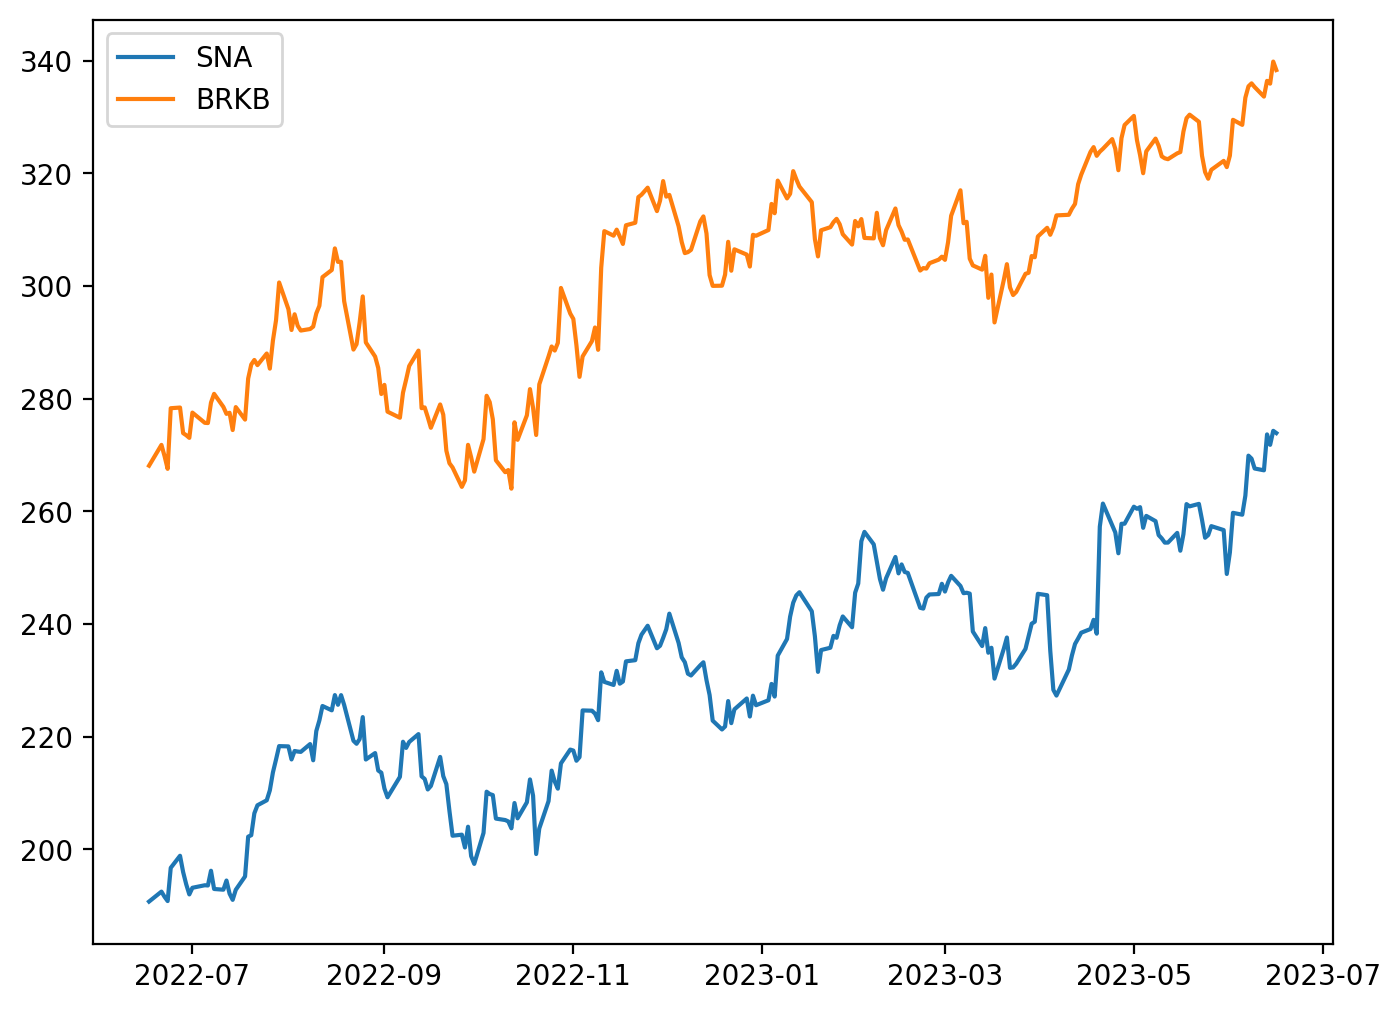

In [34]:
plt.plot(SNA, label = 'SNA')
plt.plot(BRKB, label = 'BRKB')
plt.legend()   

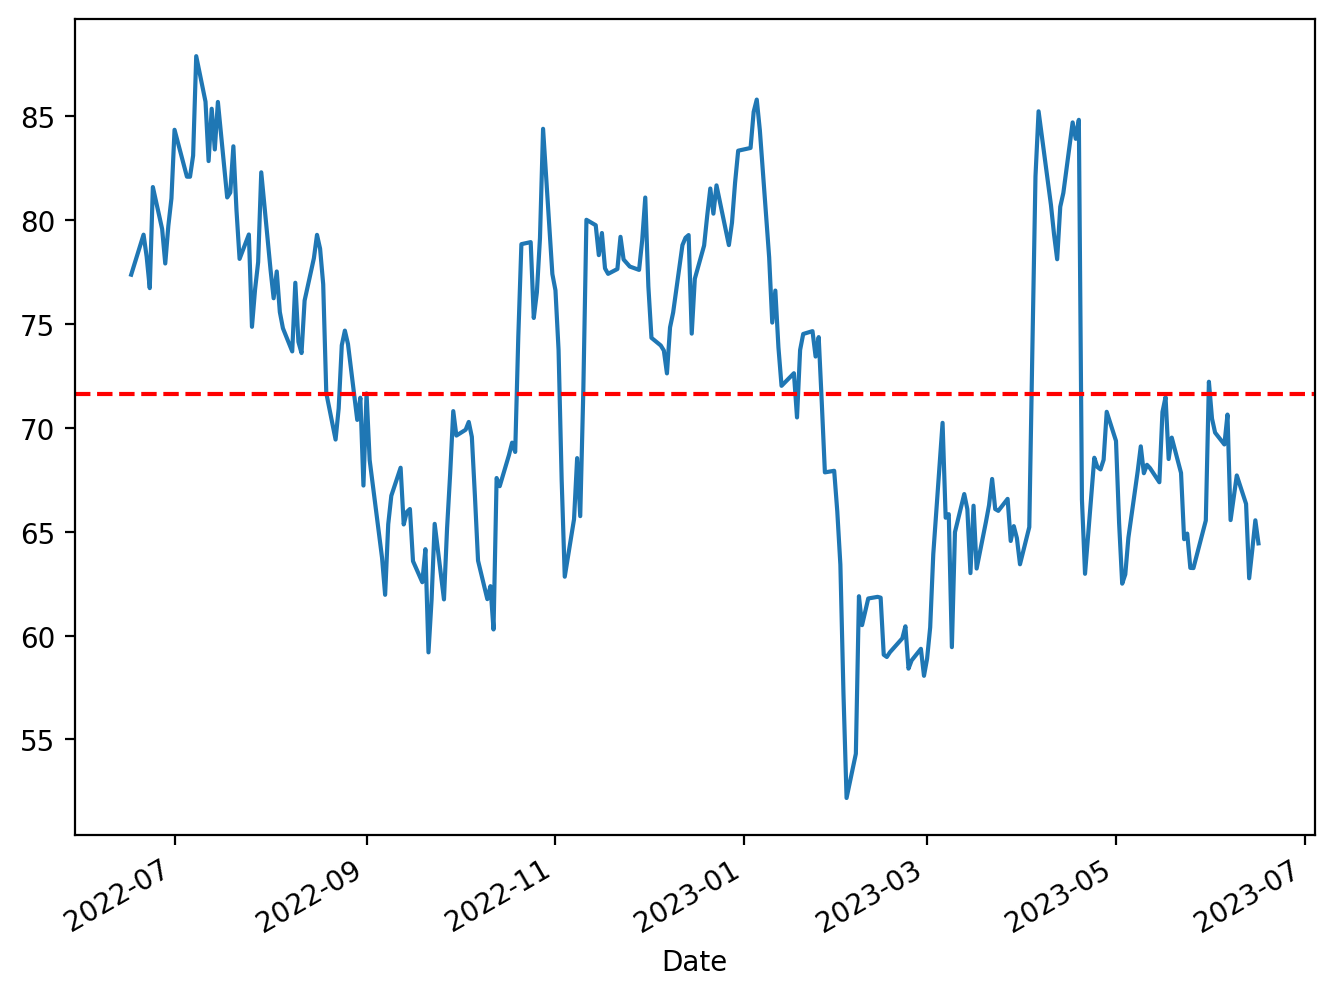

In [33]:
(BRKB - SNA).plot()
plt.axhline((BRKB - SNA).mean(), color='red', linestyle='--')